# Embudos de producto simples
Hoy veremos los embudos de producto simples. Son una herramienta clave en el _marketing_. Su nombre viene de la forma visual de un embudo: muchos usuarios empiezan en el primer paso, pero sólo algunos pasan a los siguientes. Es una forma organizada de ver el viaje del usuario. Por ejemplo, 1000 usuarios visitan la página, 200 agregan un producto al carrito, 40 inician el proceso de pago y 20 terminan en compra exitosa. Con esta información se puede calcular la tasa de conversión en cada etapa para ver en qué parte del proceso vendría bien una mejora.

Trabajaremos con este [_dataset_ de _Kaggle_](https://www.kaggle.com/datasets/sufya6/e-commerce-customer-journey-click-to-conversion).

## Agrupación de los datos y cuenta de los eventos
Para empezar vamos a crear una variable llamada `events`, la cual contendrá nuestro _dataset_.

In [1]:
import pandas as pd
events = pd.read_csv('customer_journey.csv')
display(events.head(3))

,SessionID,UserID,Timestamp,PageType,DeviceType,Country,ReferralSource,TimeOnPage_seconds,ItemsInCart,Purchased
0,session_0,user_2223,2025-01-20 22:53:34,home,Desktop,India,Social Media,55,0,0
1,session_1,user_2192,2025-02-26 12:57:10,home,Tablet,Germany,Email,99,0,0
2,session_1,user_2192,2025-02-26 12:59:11,product_page,Tablet,Germany,Email,121,0,0


Tenemos 10 columnas. Nuestra columna de interés es la columna `PageType`, que nos indica cada uno de los eventos, así que vamos a agrupar la información con base en ella. Así de fácil es como uno cuenta los eventos. El resultado es el número total de eventos para cada tipo de página del embudo.

In [2]:
events_count = events.groupby('PageType').agg({'UserID': 'count'})
display(events_count.sort_values(by = 'UserID', ascending = False))

,UserID
PageType,
home,5000
product_page,3987
cart,1599
checkout,1123
confirmation,1010


El evento `home` que es la página de inicio tiene 5000 eventos y el evento final, `confirmation`, tiene 1010. Eso es un poco más de una quinta parte de los usuarios de la página finalizando el proceso. Datos alucinantes. Seguro vendían los boletos del concierto de _Kanye West_ en México, ¿no?

Así que ya tenemos nuestro embudo, ¿pero está bien? No lo está. Lo que queremos analizar no son los eventos en realidad, sino los usuarios únicos, pues un usuario puede tener eventos duplicados.

Entonces, como en este embudo queremos determinar la proporción de usuarios y no de eventos, usaremos la función de agregación `nunique` para no repetir usuarios:

In [3]:
# Éste sí es el embudo bueno.
users_count = events.groupby('PageType').agg({'UserID': 'nunique'})
display(users_count.sort_values(by = 'UserID', ascending=False))

,UserID
PageType,
home,1872
product_page,1763
cart,1084
checkout,855
confirmation,792


Muy bien. Ahora sí. Y los datos de conversión son aún más impresionantes. Debío haber sido un concierto de _Taylor Swift_, definitivamente. Vamos a graficar y dar nuestras conclusiones.

C:\Users\rober\AppData\Local\Temp\ipykernel_19104\753782088.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


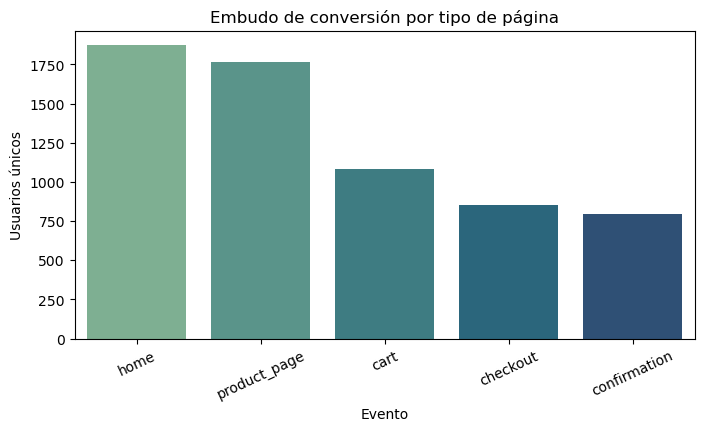

In [4]:
# Vamos a acomodar los valores con base en 'UserID' de forma descendente.
users_count = users_count.sort_values(by='UserID', ascending=False)

# Para graficar son necesarios dos de nuestros conocidos: seaborn y matplotlib.pyplot.
import seaborn as sns
import matplotlib.pyplot as plt

# Grafica de barras:
plt.figure(figsize=(8,4))
sns.barplot(
    data=users_count,
    x='PageType',
    y='UserID',
    palette='crest'
)
plt.title('Embudo de conversión por tipo de página')
plt.xlabel('Evento')
plt.ylabel('Usuarios únicos')
plt.xticks(rotation=25)
plt.show()


## Conclusiones
- Una gran proporción de usuarios que visitaron la página web (`home`) llegaron a la página de un producto (`product_page`).
- La caída más grande entre cada evento está entre la página del producto y agregarlo al carrito (`cart`).
- Una buena proporción de usuarios que agregaron un producto al carrito llego a la página de verificación (`checkout`).
- Finalmente, de la página de verificación a la confirmación de la compra (`confirmation`) tenemos una buena conversión.

Como ves, con información como ésta podemos identificar si nuestra página web o algún evento en particular no funciona correctamente y qué aspectos de ella podríamos mejorar mejorar.

Ahora, ¿qué pasaría si hay usuarios que llegaron a eventos posteriores como la verificación o confirmación sin pasar por la página de inicio o cualquier otra? ¿Cómo podríamos saber exactamente qué proporción de usuarios han pasado de una página en específico a otra página en específico? Eso se llama embudo secuenciado y lo veremos en el siguiente cuaderno. _Stay tuned!_